Get data
EDA  - feature enigineering(dummy, nlp, pca, simple function, time series)
    - null values
Turned model  - cross value
eval.model  - proper metrics
Next steps

In this project, I want to build a model to predict median earning after 6 years after college entry. This can mean that how much is starting median earning after college. I use API data of 'College ScoreCard Data' from US Department of Education. I will get scrap several data to use it as features of my model such Carnegie scale of college and percentage of majors in each college.

# Part I, API

In [2]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler



%matplotlib inline

In [3]:
api_key = 'WZ7PQxxH9YM6qidCA77pttc0zOY0ZRe2zneexO0m'

In [4]:
# Create empty list ot put data dictionary.
school_name = []
state=[]
carnegie_size_setting=[]
carnegie_class=[]
carnegie_undergrad=[]
degrees_awarded= []
size=[]
online_school=[]
highest_degree = []
complete_2_yr = []
complete_3_yr = []
complete_4_yr = []
complete_6_yr = []
ownership = []
agriculture=[]
resources=[]
architecture=[]
communication=[]
communication_tech =[]
computer=[]
personal_culinary=[]
education = []
engineering = []
engineering_tech = []
language = []
family_consumer_science =[]
legal=[]
english=[]
humanities=[]
library=[]
biological=[]
mathematics=[]
military=[]
multidiscipline=[]
parks_recreation_fitness=[]
philosophy_religious=[]
theology_religious_vocation=[]
physical_science=[]
science_technology=[]
psychology=[]
security_law_enforcement=[]
public_administration_social_service=[]
social_science=[]
construction=[]
mechanic_repair_technology=[]
precision_production=[]
transportation=[]
visual_performing=[]
health=[]
business_marketing=[]
history=[]

median_earning = []

In [5]:
# Use for loop to gather all data from every pages.
for page in range(76):
    param = {
        'api_key':api_key,
        '_page':page,
        '_per_page':100
    }
    # Url with each condition
    url='https://api.data.gov/ed/collegescorecard/v1/schools?fields=' 
    field_1 = 'school.name,'
    field_2 = 'school.state_fips,'
    field_3 = 'school.carnegie_size_setting,'
    field_4 = 'school.carnegie_basic,'
    field_5 = 'school.carnegie_undergrad,'
    field_6 = 'school.degrees_awarded.predominant,'
    field_7 = '2006.student.size,'
    field_8 = 'school.online_only,'
    field_9 = 'school.degrees_awarded.highest,'
    field_10 = '2006.completion.2_yr_completion.overall,'
    field_11 = '2006.completion.3_yr_completion.overall,'
    field_12 = '2006.completion.4_yr_completion.overall,'
    field_13 = '2006.completion.6_yr_completion.overall,'
    field_14 = 'school.ownership,'
    field_15 = '2006.academics.program_percentage.agriculture,'
    field_16 = '2006.academics.program_percentage.resources,'
    field_17 = '2006.academics.program_percentage.architecture,'
    field_18 = '2006.academics.program_percentage.communication,'
    field_19 = '2006.academics.program_percentage.communications_technology,'
    field_20 = '2006.academics.program_percentage.computer,'
    field_21 = '2006.academics.program_percentage.personal_culinary,'
    field_22 = '2006.academics.program_percentage.education,'
    field_23 = '2006.academics.program_percentage.engineering,'
    field_24 = '2006.academics.program_percentage.engineering_technology,'
    field_25 = '2006.academics.program_percentage.language,'
    field_26 = '2006.academics.program_percentage.family_consumer_science,'
    field_27 = '2006.academics.program_percentage.legal,'
    field_28 = '2006.academics.program_percentage.english,'
    field_29 = '2006.academics.program_percentage.humanities,'
    field_30 = '2006.academics.program_percentage.library,'
    field_31 = '2006.academics.program_percentage.biological,'
    field_32 = '2006.academics.program_percentage.mathematics,'
    field_33 = '2006.academics.program_percentage.military,'
    field_34 = '2006.academics.program_percentage.multidiscipline,'
    field_35 = '2006.academics.program_percentage.parks_recreation_fitness,'
    field_36 = '2006.academics.program_percentage.philosophy_religious,'
    field_37 = '2006.academics.program_percentage.theology_religious_vocation,'
    field_38 = '2006.academics.program_percentage.physical_science,'
    field_39 = '2006.academics.program_percentage.science_technology,'
    field_40 = '2006.academics.program_percentage.psychology,'
    field_41 = '2006.academics.program_percentage.security_law_enforcement,'
    field_42 = '2006.academics.program_percentage.public_administration_social_service,'
    field_43 = '2006.academics.program_percentage.social_science,'
    field_44 = '2006.academics.program_percentage.construction,'
    field_45 = '2006.academics.program_percentage.mechanic_repair_technology,'
    field_46 = '2006.academics.program_percentage.precision_production,'
    field_47 = '2006.academics.program_percentage.transportation,'
    field_48 = '2006.academics.program_percentage.visual_performing,'
    field_49 = '2006.academics.program_percentage.health,'
    field_50 = '2006.academics.program_percentage.business_marketing,'
    field_51 = '2006.academics.program_percentage.history,'
    
    
    field_target = '2012.earnings.6_yrs_after_entry.median'
    
    # combine all conditions
    new_url = url+field_1+field_2+field_3+field_4+field_5+field_6+field_7+field_8+field_9+field_10+\
    field_11+field_12+field_13+field_14+field_15+field_16+field_17+field_18+field_19+field_20+\
    field_21+field_22+field_23+field_24+field_25+field_26+field_27+field_28+field_29+field_30+field_31+\
    field_32+field_33+field_34+field_35+field_36+field_37+field_38+field_39+field_40+field_41+field_42+\
    field_43+field_44+field_45+field_46+field_47+field_48+field_49+field_50+field_51+field_target
    req = requests.get(new_url, param).json()
#     print(req)  #--> debugging
    # Put everything on the list.
    for i in req['results']:
        school_name.append(i['school.name'])
        state.append(i['school.state_fips'])
        carnegie_size_setting.append(i['school.carnegie_size_setting'])
        carnegie_class.append(i['school.carnegie_basic'])
        carnegie_undergrad.append(i['school.carnegie_undergrad'])
        degrees_awarded.append(i['school.degrees_awarded.predominant'])
        size.append(i['2006.student.size'])
        online_school.append(i['school.online_only'])
        highest_degree.append(i['school.degrees_awarded.highest'])
        complete_2_yr.append(i['2006.completion.2_yr_completion.overall'])
        complete_3_yr.append(i['2006.completion.3_yr_completion.overall'])
        complete_4_yr.append(i['2006.completion.4_yr_completion.overall'])
        complete_6_yr.append(i['2006.completion.6_yr_completion.overall'])
        ownership.append(i['school.ownership'])
        agriculture.append(i['2006.academics.program_percentage.agriculture'])
        resources.append(i['2006.academics.program_percentage.resources'])
        architecture.append(i['2006.academics.program_percentage.architecture'])
        communication.append(i['2006.academics.program_percentage.communication'])
        communication_tech.append(i['2006.academics.program_percentage.communications_technology'])
        computer.append(i['2006.academics.program_percentage.computer'])
        personal_culinary.append(i['2006.academics.program_percentage.personal_culinary'])
        education.append(i['2006.academics.program_percentage.education'])
        engineering.append(i['2006.academics.program_percentage.engineering'])
        engineering_tech.append(i['2006.academics.program_percentage.engineering_technology'])
        language.append(i['2006.academics.program_percentage.language'])
        family_consumer_science.append(i['2006.academics.program_percentage.family_consumer_science'])
        legal.append(i['2006.academics.program_percentage.legal'])
        english.append(i['2006.academics.program_percentage.english'])
        humanities.append(i['2006.academics.program_percentage.humanities'])
        library.append(i['2006.academics.program_percentage.library'])
        biological.append(i['2006.academics.program_percentage.biological'])
        mathematics.append(i['2006.academics.program_percentage.mathematics'])
        military.append(i['2006.academics.program_percentage.military'])
        multidiscipline.append(i['2006.academics.program_percentage.multidiscipline'])
        parks_recreation_fitness.append(i['2006.academics.program_percentage.parks_recreation_fitness'])
        philosophy_religious.append(i['2006.academics.program_percentage.philosophy_religious'])
        theology_religious_vocation.append(i['2006.academics.program_percentage.theology_religious_vocation'])
        physical_science.append(i['2006.academics.program_percentage.physical_science'])
        science_technology.append(i['2006.academics.program_percentage.science_technology'])
        psychology.append(i['2006.academics.program_percentage.psychology'])
        security_law_enforcement.append(i['2006.academics.program_percentage.security_law_enforcement'])
        public_administration_social_service.append(i['2006.academics.program_percentage.public_administration_social_service'])
        social_science.append(i['2006.academics.program_percentage.social_science'])
        construction.append(i['2006.academics.program_percentage.construction'])
        mechanic_repair_technology.append(i['2006.academics.program_percentage.mechanic_repair_technology'])
        precision_production.append(i['2006.academics.program_percentage.precision_production'])
        transportation.append(i['2006.academics.program_percentage.transportation'])
        visual_performing.append(i['2006.academics.program_percentage.visual_performing'])
        health.append(i['2006.academics.program_percentage.health'])
        business_marketing.append(i['2006.academics.program_percentage.business_marketing'])
        history.append(i['2006.academics.program_percentage.history'])
        
        median_earning.append(i['2012.earnings.6_yrs_after_entry.median'])
        


Even though I wrote a long and angry line to get data from a website. I will use for loop on some of the lists that have common fields such as majors and years. 

In [6]:
df = pd.DataFrame({'school_name': school_name,'state':state, 'carnegie_size':carnegie_size_setting, 
                   'carnegie_class':carnegie_class,'carnegie_undergrad':carnegie_undergrad, 
                   'degrees_awarded':degrees_awarded, 'size':size, 'online_school':online_school,
                   'highest_degree':highest_degree,'complete_2_yr':complete_2_yr,'complete_3_yr':complete_3_yr,
                   'complete_4_yr':complete_4_yr, 'complete_6_yr':complete_6_yr, 'ownership':ownership,
                   'agriculture':agriculture, 'resources':resources, 'architecture':architecture,
                   'communication':communication, 'communication_tech':communication_tech, 'computer':computer,
                   'personal_culinary':personal_culinary, "education":education, 'engineering':engineering,
                   'engineering_technology':engineering_tech, "language":language, 'fcs': family_consumer_science,
                   'legal':legal, 'english':english, 'humanities':humanities, 'library':library, 
                   'biological':biological,'math':mathematics, 'military':military, 
                   'multidiscipline':multidiscipline,'prf':parks_recreation_fitness,
                   'philosophy_religious':philosophy_religious, 'trv':theology_religious_vocation,
                   'phyical_sci':physical_science, 'sci_tech':science_technology, 'psychology':psychology,
                   'sle':security_law_enforcement, 'pass':public_administration_social_service, 'social_sci':social_science,
                   'construction':construction, 'mrt':mechanic_repair_technology, 'precision_prod':precision_production,
                   'transportation':transportation, "vp":visual_performing,'health':health,'bm':business_marketing,
                   'history':history,"median_earning":median_earning})

In [7]:
df.head()

,agriculture,architecture,biological,bm,carnegie_class,carnegie_size,carnegie_undergrad,communication,communication_tech,complete_2_yr,...,resources,school_name,sci_tech,size,sle,social_sci,state,transportation,trv,vp
0,0.0000,0.0,0.0641,0.2270,15.0,15.0,9.0,0.0376,0.0000,6557.0,...,0.0096,University of South Florida-Main Campus,0.0,33583.0,0.0000,0.1513,12,0.000,0.0,0.0283
1,0.0000,0.0,0.0000,0.0128,-3.0,-2.0,-2.0,0.0000,0.0385,47.0,...,0.0000,Radford M Locklin Technical Center,0.0,368.0,0.0000,0.0000,12,0.000,0.0,0.0000
2,0.0011,0.0,0.0000,0.0298,23.0,15.0,5.0,0.0000,0.0000,4084.0,...,0.0000,St Petersburg College,0.0,19544.0,0.0903,0.0000,12,0.000,0.0,0.0083
3,0.0000,0.0,0.0000,0.0446,7.0,15.0,5.0,0.0000,0.0000,5480.0,...,0.0000,Broward College,0.0,25162.0,0.0153,0.0000,12,0.011,0.0,0.0132
4,0.0000,0.0,0.0000,0.0000,24.0,6.0,5.0,0.0000,0.0000,73.0,...,0.0000,Luther Rice College & Seminary,0.0,386.0,0.0000,0.0000,13,0.000,1.0,0.0000


In [8]:
# I will save first, so I do not have to go back to get API again
# because there are limitation on the data.
df.to_csv('new_data.csv', index=False)

# Part II, EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 52 columns):
agriculture               5287 non-null float64
architecture              5287 non-null float64
biological                5287 non-null float64
bm                        5287 non-null float64
carnegie_class            7147 non-null float64
carnegie_size             7147 non-null float64
carnegie_undergrad        7147 non-null float64
communication             5287 non-null float64
communication_tech        5287 non-null float64
complete_2_yr             5335 non-null float64
complete_3_yr             5281 non-null float64
complete_4_yr             5227 non-null float64
complete_6_yr             5122 non-null float64
computer                  5287 non-null float64
construction              5287 non-null float64
degrees_awarded           7593 non-null int64
education                 5287 non-null float64
engineering               5287 non-null float64
engineering_technology    5287 

In [10]:
# Some of features are number coded, which mean that they are not numbers, but each has its own meaning.
# Therefore, I will change it to object.
df[['carnegie_class','carnegie_size', 'carnegie_undergrad', 'degrees_awarded', 'state','highest_degree','online_school']] = \
    df[['carnegie_class','carnegie_size', 'carnegie_undergrad', 'degrees_awarded', 'state','highest_degree','online_school']].astype('object')

In [11]:
# For missing value is target(median_earning), I will eliminate those rows. 
import numpy as np

df = df[np.isfinite(df.median_earning)]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5663 entries, 0 to 7591
Data columns (total 52 columns):
agriculture               4768 non-null float64
architecture              4768 non-null float64
biological                4768 non-null float64
bm                        4768 non-null float64
carnegie_class            5362 non-null object
carnegie_size             5362 non-null object
carnegie_undergrad        5362 non-null object
communication             4768 non-null float64
communication_tech        4768 non-null float64
complete_2_yr             4889 non-null float64
complete_3_yr             4858 non-null float64
complete_4_yr             4815 non-null float64
complete_6_yr             4751 non-null float64
computer                  4768 non-null float64
construction              4768 non-null float64
degrees_awarded           5663 non-null object
education                 4768 non-null float64
engineering               4768 non-null float64
engineering_technology    4768 no

In [13]:
# check columns that have missing values
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

complete_6_yr             912
size                      897
vp                        895
education                 895
trv                       895
history                   895
health                    895
fcs                       895
english                   895
engineering_technology    895
engineering               895
construction              895
legal                     895
computer                  895
communication_tech        895
communication             895
bm                        895
biological                895
architecture              895
language                  895
humanities                895
library                   895
precision_prod            895
transportation            895
social_sci                895
sle                       895
sci_tech                  895
resources                 895
math                      895
prf                       895
psychology                895
phyical_sci               895
philosophy_religious      895
personal_c

In [14]:
X = df.drop(['median_earning','school_name'], axis=1).copy()
y = df['median_earning'].copy()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=24)

In [16]:
numerical_col = [X_train._get_numeric_data().columns]
numerical_col

[Index(['agriculture', 'architecture', 'biological', 'bm', 'communication',
        'communication_tech', 'complete_2_yr', 'complete_3_yr', 'complete_4_yr',
        'complete_6_yr', 'computer', 'construction', 'education', 'engineering',
        'engineering_technology', 'english', 'fcs', 'health', 'history',
        'humanities', 'language', 'legal', 'library', 'math', 'military', 'mrt',
        'multidiscipline', 'ownership', 'pass', 'personal_culinary',
        'philosophy_religious', 'phyical_sci', 'precision_prod', 'prf',
        'psychology', 'resources', 'sci_tech', 'size', 'sle', 'social_sci',
        'transportation', 'trv', 'vp'],
       dtype='object')]

In [17]:
for col in numerical_col:
    X_train.loc[:,col] = X_train.loc[:, col].fillna(X_train.loc[:, col].median())
    X_test.loc[:,col] = X_test.loc[:, col].fillna(X_train.loc[:, col].median())

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
print(X_train.isnull().sum()[X_train.isnull().sum() > 0].sort_values(ascending=False))
print(X_test.isnull().sum()[X_test.isnull().sum() > 0].sort_values(ascending=False))

online_school         238
carnegie_undergrad    238
carnegie_size         238
carnegie_class        238
dtype: int64
online_school         63
carnegie_undergrad    63
carnegie_size         63
carnegie_class        63
dtype: int64


### For object columns, carnegie scale and online or not, 
### I cannot estimate it from other schools because all schools have different conditions.
### Therefore, I drop remaining missing values. 

In [19]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)



In [20]:
X_train = df_train.drop('median_earning', axis=1)
y_train = df_train['median_earning']

X_test = df_test.drop('median_earning', axis=1)
y_test = df_test['median_earning']

In [21]:
print(X_train.isnull().sum()[X_train.isnull().sum() > 0].sort_values(ascending=False))
print(X_test.isnull().sum()[X_test.isnull().sum() > 0].sort_values(ascending=False))

Series([], dtype: int64)
Series([], dtype: int64)


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4292 entries, 5579 to 5919
Data columns (total 50 columns):
agriculture               4292 non-null float64
architecture              4292 non-null float64
biological                4292 non-null float64
bm                        4292 non-null float64
carnegie_class            4292 non-null object
carnegie_size             4292 non-null object
carnegie_undergrad        4292 non-null object
communication             4292 non-null float64
communication_tech        4292 non-null float64
complete_2_yr             4292 non-null float64
complete_3_yr             4292 non-null float64
complete_4_yr             4292 non-null float64
complete_6_yr             4292 non-null float64
computer                  4292 non-null float64
construction              4292 non-null float64
degrees_awarded           4292 non-null object
education                 4292 non-null float64
engineering               4292 non-null float64
engineering_technology    4292

In [23]:
train = pd.concat([X_train,y_train], axis=1)

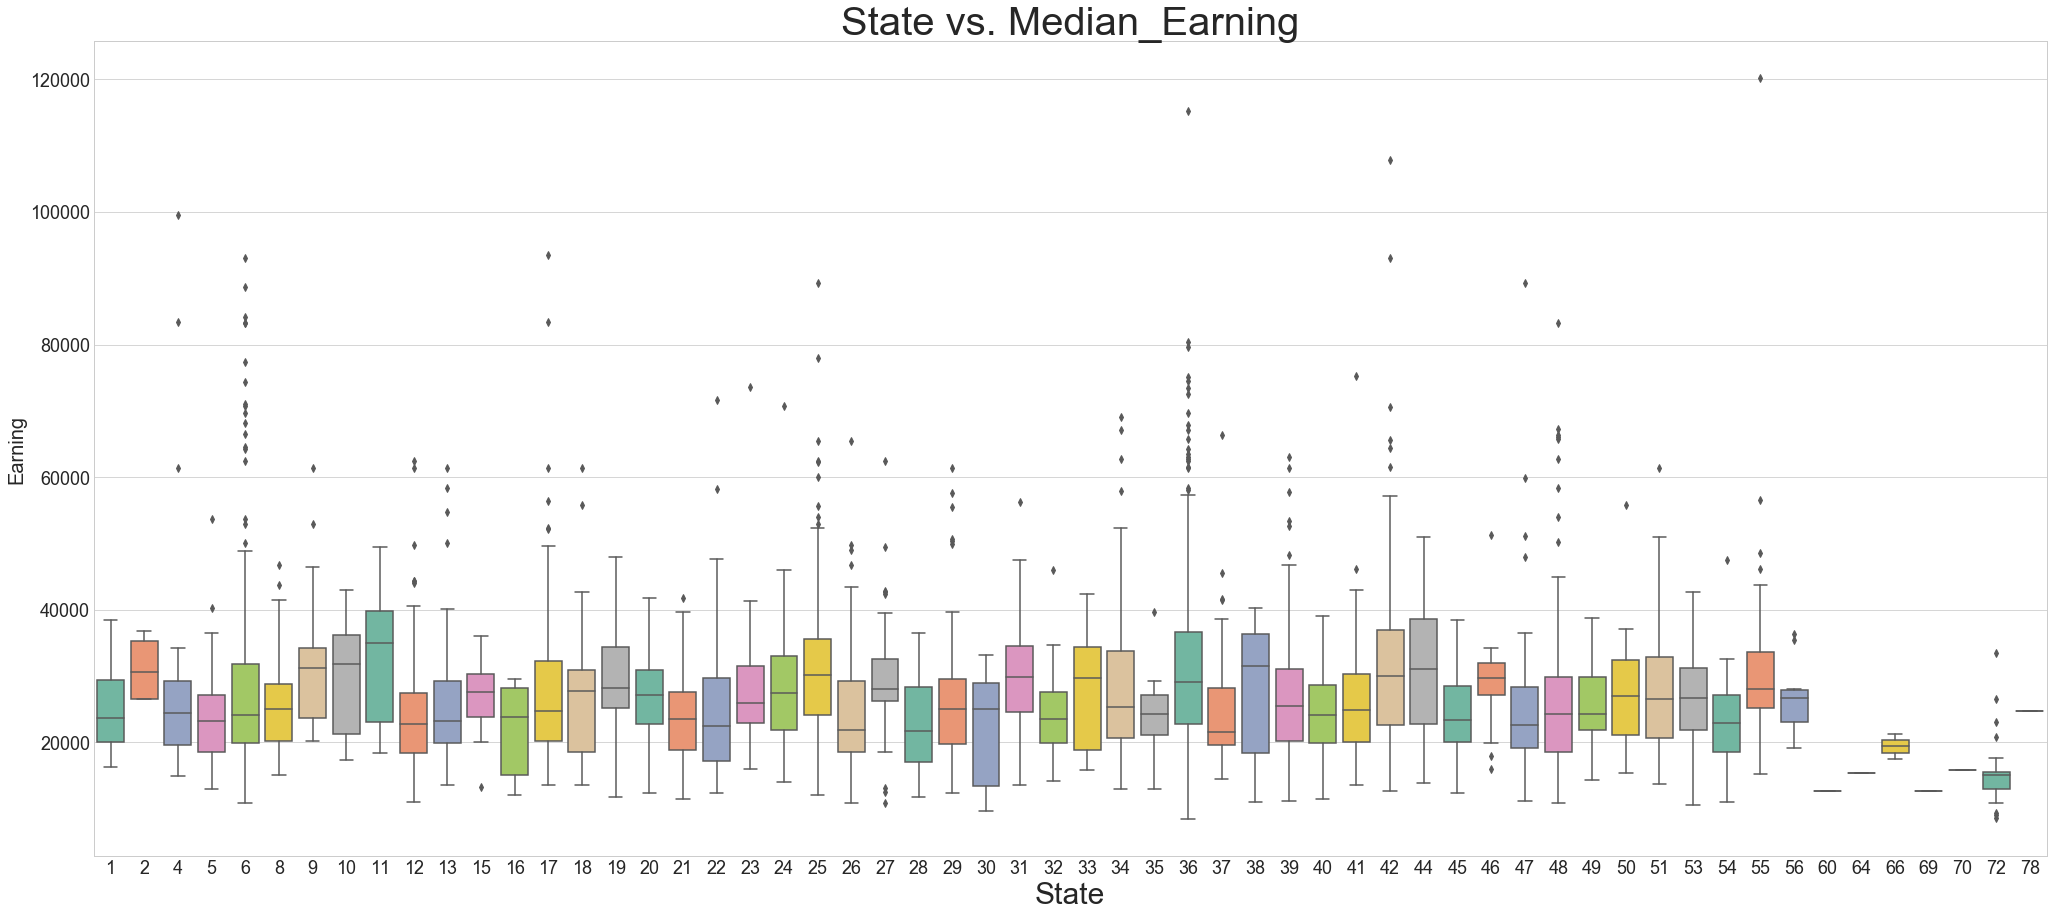

In [49]:
# boxplot of State
# create subplots with fig size
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(35, 15))
fig = sns.boxplot(x='state', y="median_earning", data=train, palette="Set2")

# Give labels and titles.
ax.set_title("State vs. Median_Earning", fontdict={'fontsize': 40})
ax.set_ylabel('Earning', fontdict={'fontsize': 20})
ax.set_xlabel('State', fontdict={'fontsize': 30})
ax.tick_params(labelsize=18);


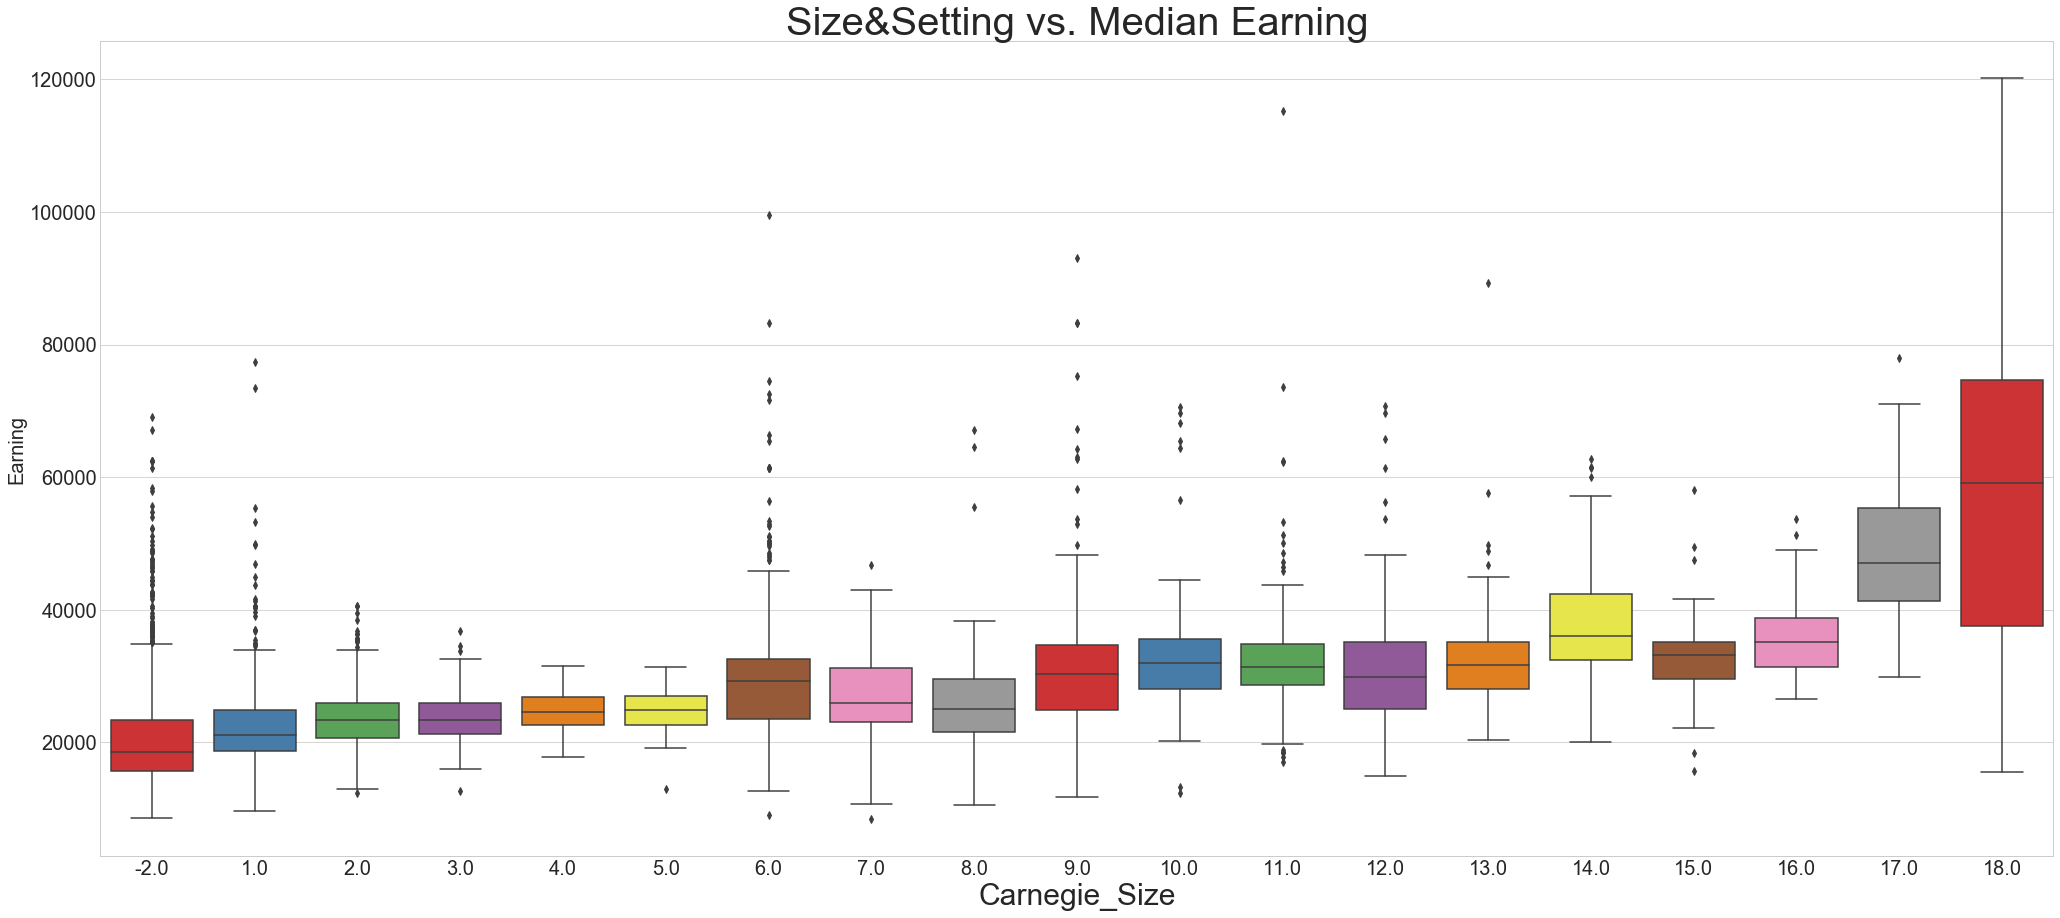

In [72]:
fig, ax = plt.subplots(figsize=(35, 15))
fig = sns.boxplot(x='carnegie_size', y="median_earning", data=train, palette="Set1")

# Give labels and titles.
ax.set_title("Size&Setting vs. Median Earning", fontdict={'fontsize': 40})
ax.set_ylabel('Earning', fontdict={'fontsize': 20})
ax.set_xlabel('Carnegie_Size', fontdict={'fontsize': 30})
ax.tick_params(labelsize=20);

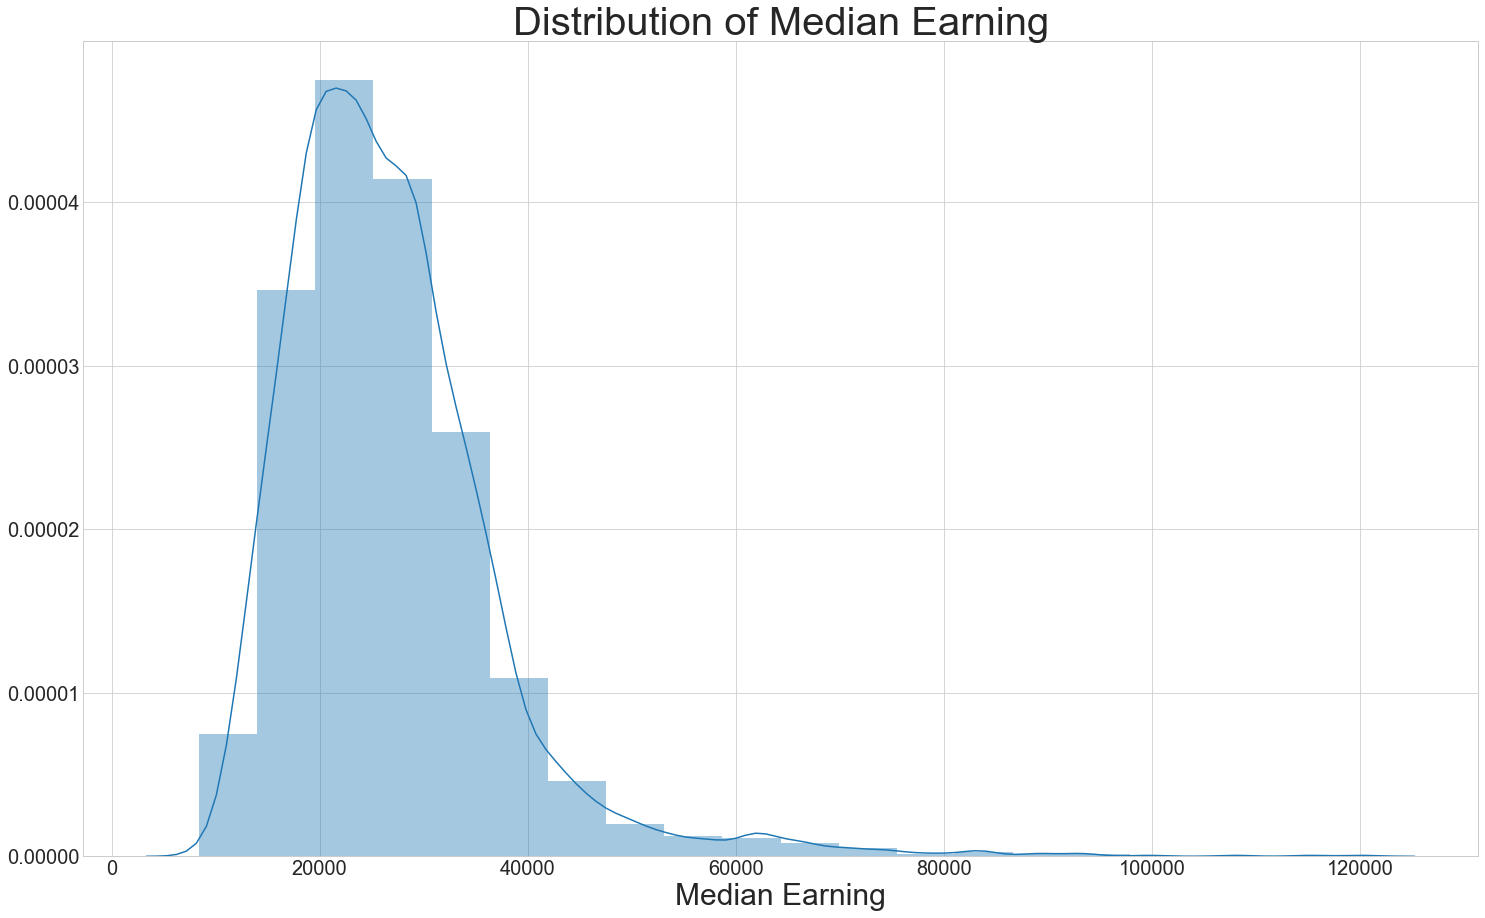

In [47]:
fig, ax = plt.subplots(figsize=(25, 15))
fig = sns.distplot(train["median_earning"], bins=20)

# Give labels and titles.
ax.set_title("Distribution of Median Earning", fontdict={'fontsize': 40})
ax.set_xlabel('Median Earning', fontdict={'fontsize': 30})
ax.tick_params(labelsize=20);

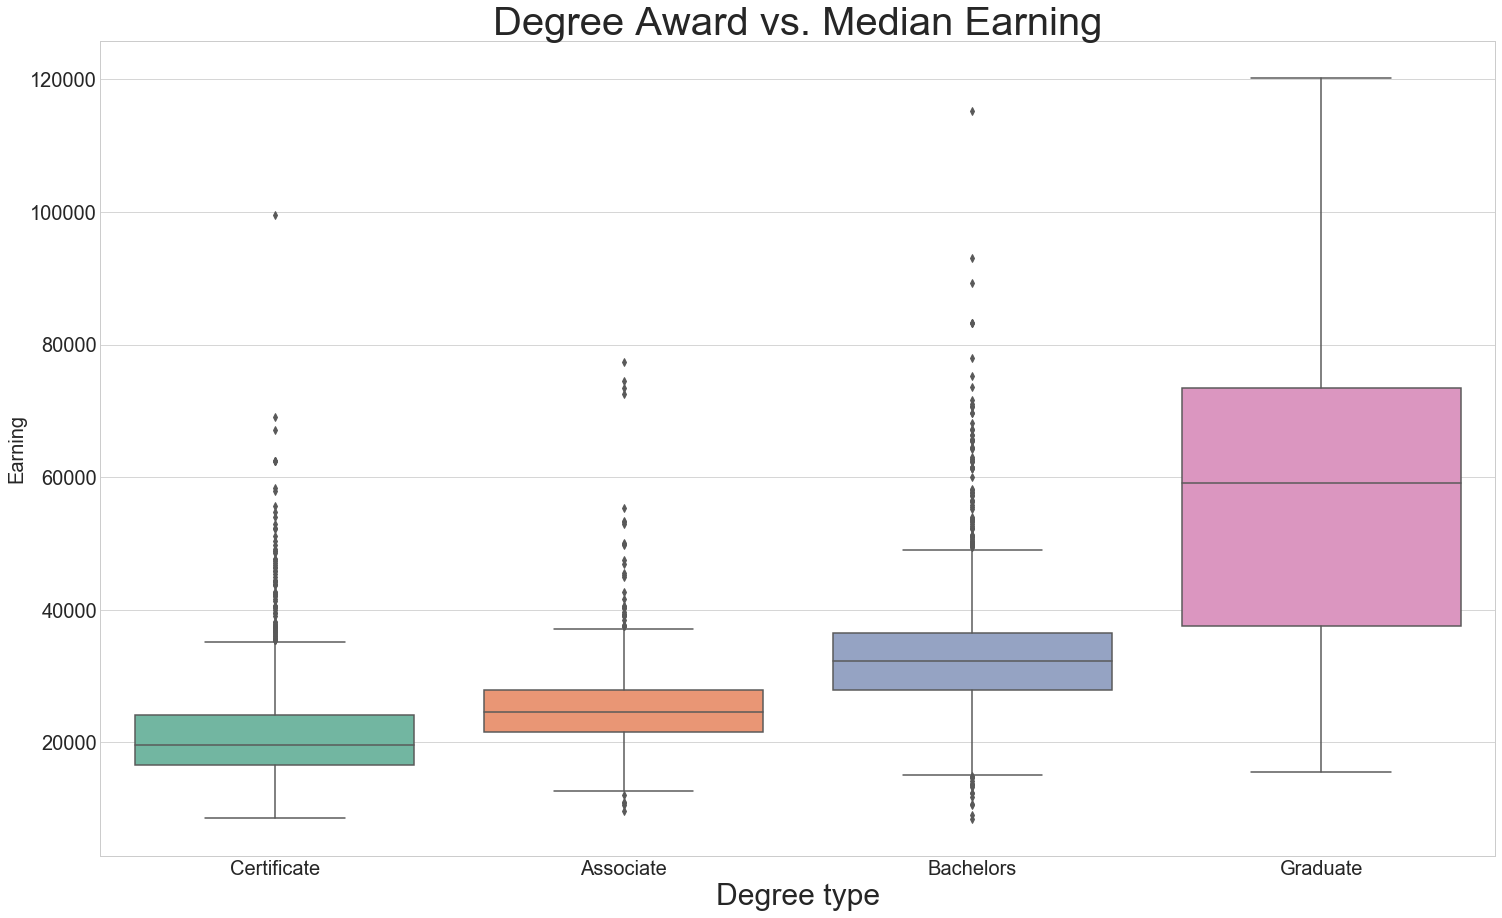

In [73]:
# Check median earning differences depends on degrees_awarded

fig, ax = plt.subplots(figsize=(25, 15))
fig = sns.boxplot(x='degrees_awarded', y="median_earning", data=train, palette="Set2")

# Give labels and titles.
ax.set_title("Degree Award vs. Median Earning", fontdict={'fontsize': 40})
ax.set_ylabel('Earning', fontdict={'fontsize': 20})
ax.set_xlabel('Degree type', fontdict={'fontsize': 30})
ax.tick_params(labelsize=20)
labels = ['Certificate', 'Associate', 'Bachelors', 'Graduate']
ax.set_xticklabels(labels);

I can see that even though there are many outliers, graduate degree school has more median earning than other degrees.

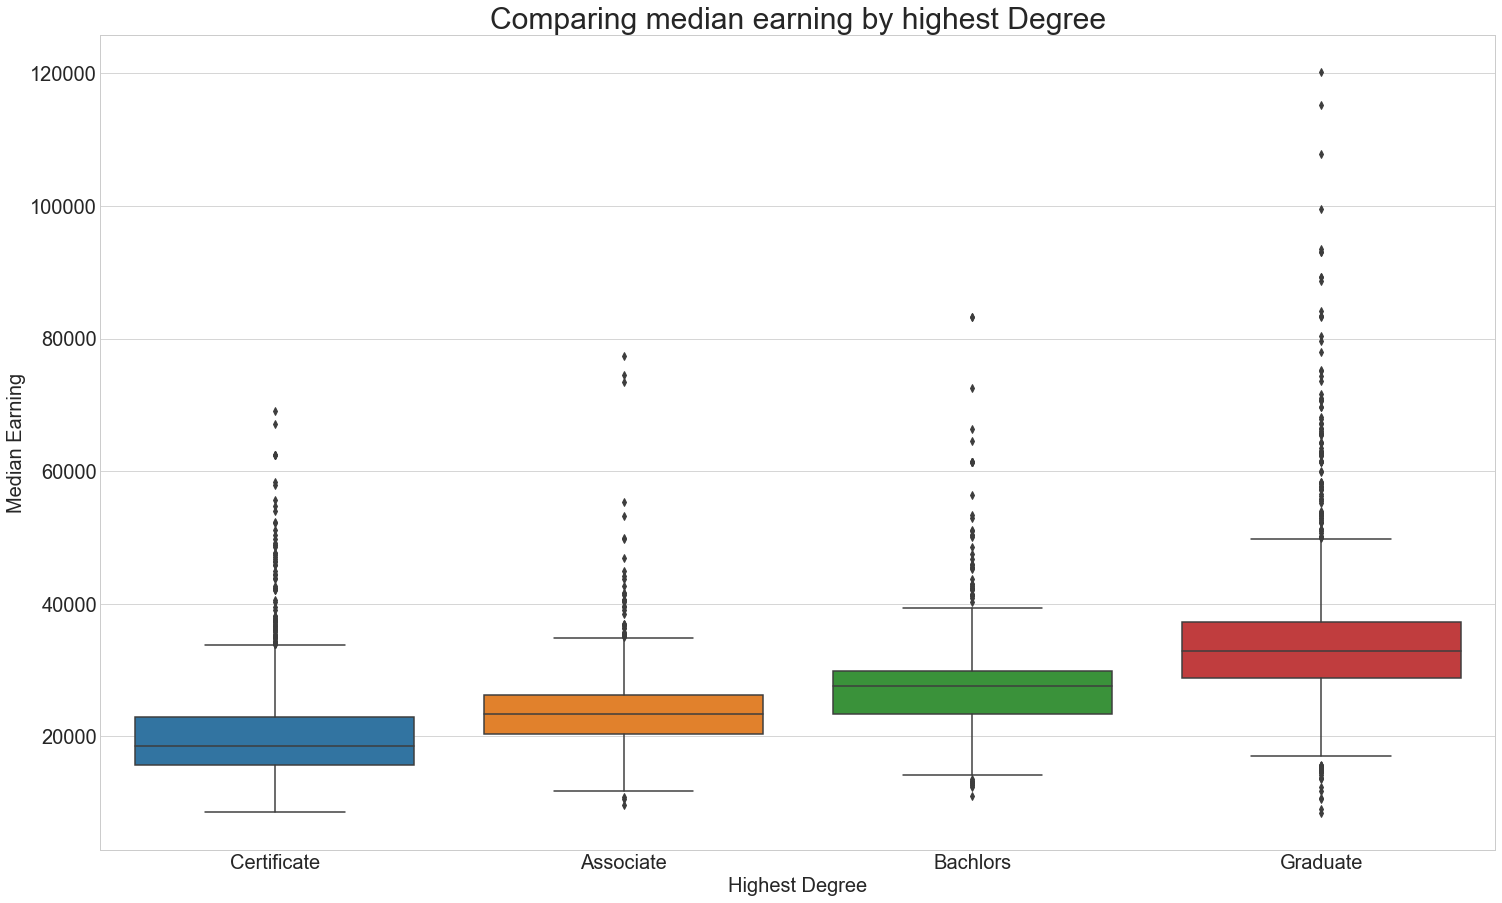

In [50]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.boxplot(x=train['highest_degree'], y=train['median_earning'])

# set title and x,y label.

plt.ylabel('Median Earning', fontsize=20)
plt.xlabel('Highest Degree', fontsize=20)
labels = ['Certificate', 'Associate', 'Bachelors', 'Graduate']
ax.set_xticklabels(labels)
plt.title("Comparing median earning by highest Degree", fontsize=30)
ax.tick_params(labelsize=20);

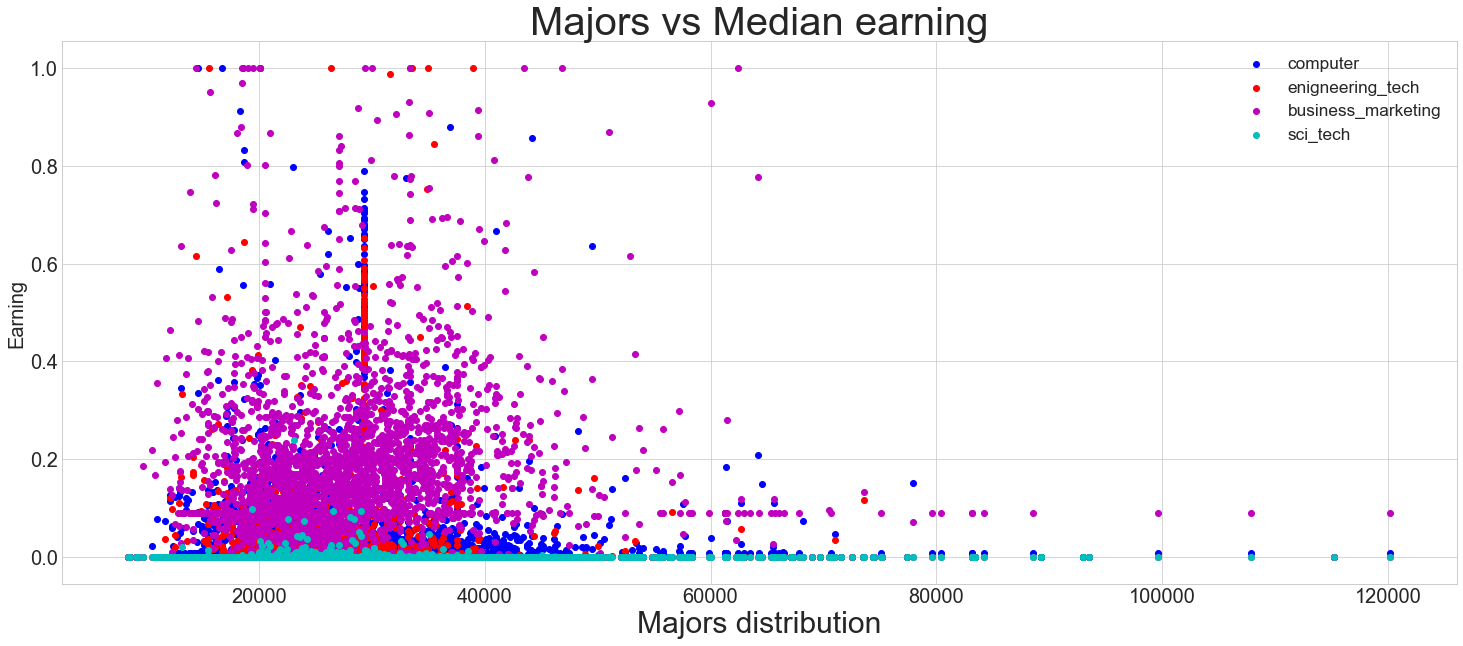

In [53]:
# Check some popular majors
fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(y=train['computer'], x=train['median_earning'],c='b', lw=1)
ax.scatter(y=train['engineering_technology'], x=train['median_earning'], c='r', lw=1, label='enigneering_tech')
ax.scatter(y=train['bm'], x=train['median_earning'], c='m', lw=1, label='business_marketing')
ax.scatter(y=train['sci_tech'], x=train['median_earning'], c='c', lw=1, label='sci_tech')

ax.set_title("Majors vs Median earning", fontdict={'fontsize': 40})
ax.set_ylabel('Earning', fontdict={'fontsize': 20})
ax.set_xlabel('Majors distribution', fontdict={'fontsize': 30})
ax.legend(fontsize='xx-large')
ax.tick_params(labelsize=20);

In [55]:
categorical_columns = list(X_train.select_dtypes(include=['object']).columns)

In [56]:
categorical_columns

['carnegie_class',
 'carnegie_size',
 'carnegie_undergrad',
 'degrees_awarded',
 'highest_degree',
 'online_school',
 'state']

In [57]:
# for object, I will make it as dummies and see it as binary(0,1)
for col in categorical_columns:
    
    train_values = sorted(list(X_train[col].unique()))
    test_values = sorted(list(X_test[col].unique()))
    categories = set(train_values + test_values)
    X_train[col] = pd.Categorical(X_train[col], categories=categories)
    X_test[col] = pd.Categorical(X_test[col], categories=categories)
    
train_dummies = pd.get_dummies(X_train[categorical_columns])
test_dummies = pd.get_dummies(X_test[categorical_columns])

In [58]:
numerical_col = X_train._get_numeric_data().columns
numerical_col

Index(['agriculture', 'architecture', 'biological', 'bm', 'communication',
       'communication_tech', 'complete_2_yr', 'complete_3_yr', 'complete_4_yr',
       'complete_6_yr', 'computer', 'construction', 'education', 'engineering',
       'engineering_technology', 'english', 'fcs', 'health', 'history',
       'humanities', 'language', 'legal', 'library', 'math', 'military', 'mrt',
       'multidiscipline', 'ownership', 'pass', 'personal_culinary',
       'philosophy_religious', 'phyical_sci', 'precision_prod', 'prf',
       'psychology', 'resources', 'sci_tech', 'size', 'sle', 'social_sci',
       'transportation', 'trv', 'vp'],
      dtype='object')

In [59]:
# Combine numerical and categorical columns.
X_train_new = pd.concat([train_dummies, X_train[numerical_col]], axis=1)
X_test_new = pd.concat([test_dummies, X_test[numerical_col]], axis=1)

In [60]:
X_train_new.head()

,carnegie_class_1.0,carnegie_class_2.0,carnegie_class_3.0,carnegie_class_4.0,carnegie_class_5.0,carnegie_class_6.0,carnegie_class_7.0,carnegie_class_8.0,carnegie_class_9.0,carnegie_class_10.0,...,prf,psychology,resources,sci_tech,size,sle,social_sci,transportation,trv,vp
5579,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000,0.000,0.0,365.0,0.0000,0.0000,0.0,0.0,0.0000
5471,0,0,0,0,0,0,0,0,0,0,...,0.0,0.095,0.002,0.0,2055.0,0.2277,0.0218,0.0,0.0,0.0277
5261,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000,0.000,0.0,71.0,0.0000,0.0000,0.0,0.0,0.0000
6541,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000,0.000,0.0,375.0,0.0000,0.0000,0.0,0.0,0.0000
5727,0,0,0,0,0,0,0,0,1,0,...,0.0,0.000,0.000,0.0,281.0,0.0000,0.0000,0.0,0.0,0.0000


# Baseline

In [61]:
# Baseline

baseline = y_train.mean()
baseline

26805.84808946878

In [62]:
dr = DummyRegressor(strategy='mean')
dr.fit(X_train_new,y_train)
print("baseline R^2 score is ",dr.score(X_test_new,y_test))

y_baseline = dr.predict(X_test_new)

print("Baseline RMSE = ",np.sqrt(mean_squared_error(y_test, y_baseline)))

baseline R^2 score is  -0.00263272206947
Baseline RMSE =  11131.6180454


#### R^2 should be zero. Yet, R^2 is not exactly zero because I used mean of training data and comparing to test data(which is new data). However, it is almost zero and I have Root mean squared error of 9714.88, which means that my model should have an average of errors less than 9714.88.

# Modeling

### Model 1, Linear Regression

In [63]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train_new)
Xs_test = ss.transform(X_test_new)
lr = LinearRegression()
lr.fit(Xs_train, y_train)


print(cross_val_score(lr, Xs_train, y_train, cv=10).mean())
print(cross_val_score(lr, Xs_test, y_test, cv=10).mean())

y_pred = lr.predict(Xs_test)

print ('RMSE for Linear regression is: \n', np.sqrt(mean_squared_error(y_test, y_pred)))

-4.32747527355e+25
-2.17733064762e+25
RMSE for Linear regression is: 
 7052.29105092


### Model 2, ElasticNet

### I will use RandomizedsearchCV, instead of gridsearchCV  because it reduces time for finding optimal search and it does not test fixed points

In [64]:
# First, ElasticNet model for my model


pipe =Pipeline([
    ('ss', StandardScaler()),
    ('model',ElasticNet())
])

en_params = {
    'model__fit_intercept': [True, False],
    'model__normalize': [True, False],
    'model__alpha': np.linspace(1, 100, 10),
    'model__l1_ratio': np.linspace(0.1, 0.9, 10)
    
}
en_w_pca = RandomizedSearchCV(pipe, en_params,verbose=1, cv=20)
en_w_pca.fit(X_train_new,y_train)
print('For train set', en_w_pca.score(X_train_new, y_train))
print('For test set', en_w_pca.score(X_test_new,y_test))
pred_en_w_pca = en_w_pca.predict(X_test_new)
print("RMSE is ",np.sqrt(mean_squared_error(y_test, pred_en_w_pca)))

Fitting 20 folds for each of 10 candidates, totalling 200 fits
For train set 0.352997779928
For test set 0.335294993181
RMSE is  9063.62302629


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   10.8s finished


Elasticnet model shows me 7721.06 of RMSE, so this model is slightly better than baseline.

### Model 3, GradientBoosting

In [65]:

pipe =Pipeline([
    ('ss', StandardScaler()),
    ('model',GradientBoostingRegressor())
])

gbr_params = {
    'model__n_estimators': range(50,200, 10),
    'model__max_depth': range(1,10),
    'model__max_features': ['auto', 'sqrt','log2', None],
    
}
rs_gbr = RandomizedSearchCV(pipe, gbr_params,cv=20, n_jobs=-1, verbose=1)


In [66]:
rs_gbr.fit(X_train_new,y_train)
print('Without pca, train set score is ', rs_gbr.score(X_train_new, y_train))
print('Without pca, test set score is ', rs_gbr.score(X_test_new, y_test))
y_pred_gbr_rs = rs_gbr.predict(X_test_new)
print("RMSE is ",np.sqrt(mean_squared_error(y_test, y_pred_gbr_rs)))

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.5s finished


Without pca, train set score is  0.962867261165
Without pca, test set score is  0.739479222778
RMSE is  5674.2509838


### Model 4, RandomForest

In [67]:

rfr_params = {
    'model__n_estimators': range(10,200, 50),
    'model__max_features': ['auto', 'log2', None]
    
}

pipe_rfr =Pipeline([
    ('ss', StandardScaler()),
    ('model',RandomForestRegressor())
])

rs_rfr= RandomizedSearchCV(pipe_rfr, rfr_params,cv=20, n_jobs=-1, verbose=1)
rs_rfr.fit(X_train_new,y_train)
print(rs_rfr.score(X_test_new, y_test))
y_pred_rfr = rs_rfr.predict(X_test_new)
print("RMSE is ",np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.5min finished


0.722371262477
RMSE is  5857.59806602


### Model 5, SVR

In [68]:


svr_params = {
    'model__C': range(1,10),
    'model__epsilon':np.linspace(0.1, 1,10),
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    
}

pipe_svr =Pipeline([
    ('ss', StandardScaler()),
    ('model',SVR())
])

rs_svr= RandomizedSearchCV(pipe_svr, svr_params,cv=10, n_jobs=-1, verbose=1)
rs_svr.fit(X_train_new,y_train)
print(rs_svr.score(X_test_new, y_test))
y_pred_svr = rs_svr.predict(X_test_new)
print("RMSE is ",np.sqrt(mean_squared_error(y_test, y_pred_svr)))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished


0.550611424362
RMSE is  7452.43802059


# Evaluation & Conclusion

#### Gradient Boosting model gives me lowest RMSE, which means that if I use this model, I will get residual average of $4887.38. Moreover, I changed random_state on train&test split to check how my model's RMSE are different on different test set. My largest RMSE on gradient boosting was around 5300. I can say that with 1000 is  acceptable RMSE. 

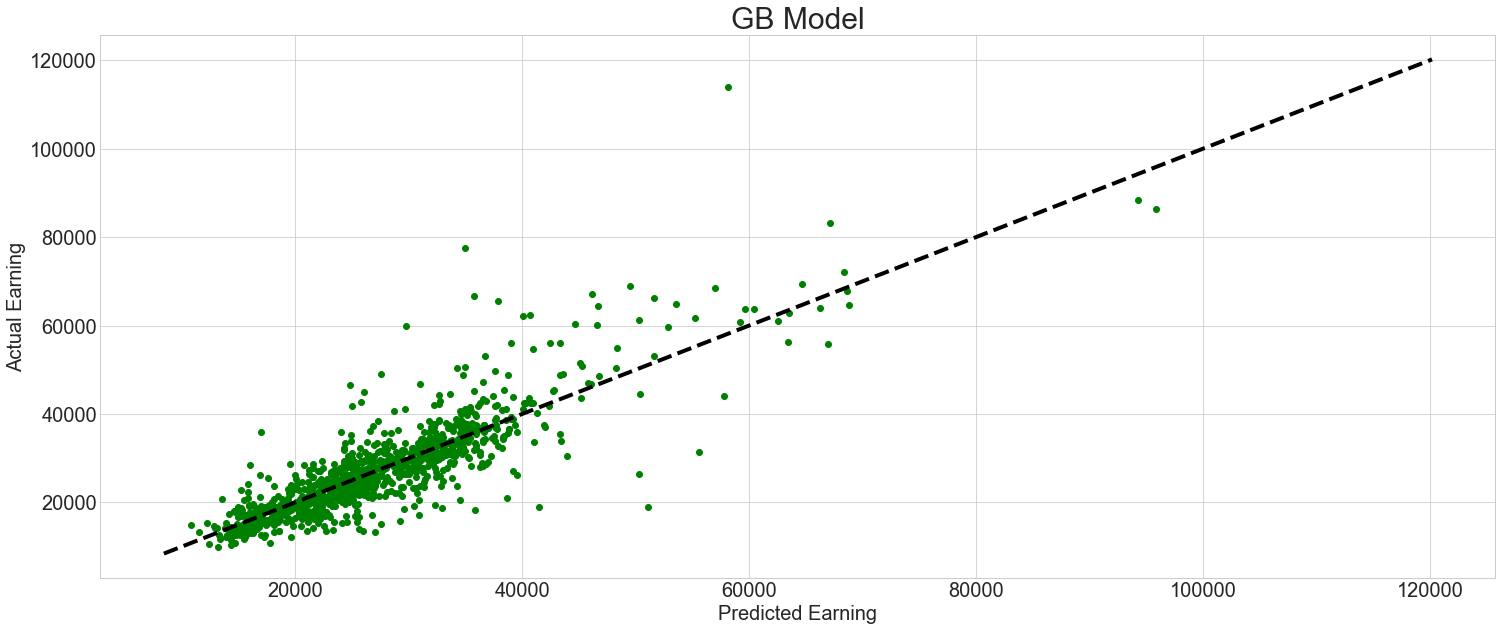

In [74]:
fig, ax = plt.subplots(figsize=(25, 10))
actual_values = y_test
plt.scatter(y_pred_gbr_rs, actual_values, color='g') 
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color = 'black')
plt.xlabel('Predicted Earning', fontsize=20)
plt.ylabel('Actual Earning', fontsize=20)
plt.title('GB Model', fontsize=30)
ax.tick_params(labelsize=20);

In [70]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train_new, y_train)
feature_importance = gbr.feature_importances_
columns_df = pd.DataFrame({'columns':X_train_new.columns, 'importances':feature_importance*100})
columns_df.sort_values('importances', ascending=False, inplace=True)

top_10_features = columns_df.head(15)
top_10_features

,columns,importances
155,health,5.120945
147,complete_6_yr,4.282600
53,carnegie_undergrad_0.0,4.045278
146,complete_4_yr,3.944689
77,highest_degree_4,3.842994
165,ownership,3.661868
136,state_72,3.588152
72,degrees_awarded_3,3.250228
175,size,3.167008
151,engineering,3.119524


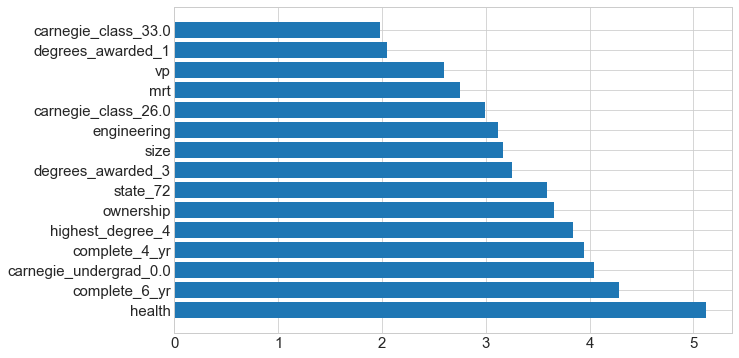

In [71]:
fig,ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(15)
plt.barh(y_pos, top_10_features.importances, align='center')
plt.yticks(y_pos, top_10_features['columns'])
ax.tick_params(labelsize=15);

#### From Feature importance, I realize that health major is the most important feature to predict median earning.

# Next Steps

1. I use 2012 median earning data, but around 1000 target data are null values. To make accurate model, more data should be in website. 
2. Not just target data, but also many features are missing when I get data from Education Department API. To make accurate model, I need to have more data.
3. 2012 is five year ago. If I want to use today's median earning after college, I should consider other conditions as well such as inflation and job market status. 
4. I want to explore more features that influence on median earning of college graduated people.

# Extra Practice, NN on regression

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using Theano backend.


In [45]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train_new)
Xs_test = ss.transform(X_test_new)

In [46]:
y_train= y_train.values
y_test = y_test.values

In [51]:
model = Sequential()

model.add(Dense(181, input_dim=181, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')

model.fit(Xs_train, y_train, validation_data=(Xs_test, y_test), epochs=100)

Train on 4291 samples, validate on 1071 samples
Epoch 1/100
4291/4291 [==============================] - 0s 52us/step - loss: 18357.1535 - val_loss: 5155.2485
Epoch 2/100
4291/4291 [==============================] - 0s 55us/step - loss: 4713.2539 - val_loss: 3986.6586
Epoch 3/100
4291/4291 [==============================] - 0s 50us/step - loss: 4012.2212 - val_loss: 3711.4565
Epoch 4/100
4291/4291 [==============================] - 0s 51us/step - loss: 3743.7713 - val_loss: 3636.6407
Epoch 5/100
4291/4291 [==============================] - 0s 51us/step - loss: 3598.8993 - val_loss: 3607.1482
Epoch 6/100
4291/4291 [==============================] - 0s 83us/step - loss: 3466.6258 - val_loss: 3527.4234
Epoch 7/100
4291/4291 [==============================] - 0s 85us/step - loss: 3334.6971 - val_loss: 3464.3553
Epoch 8/100
4291/4291 [==============================] - 0s 79us/step - loss: 3255.8575 - val_loss: 3466.8196
Epoch 9/100
4291/4291 [==============================] - 0s 81us/step -

Epoch 74/100
4291/4291 [==============================] - 0s 95us/step - loss: 1856.0816 - val_loss: 3315.9664
Epoch 75/100
4291/4291 [==============================] - 0s 87us/step - loss: 1851.1262 - val_loss: 3343.6575
Epoch 76/100
4291/4291 [==============================] - 0s 85us/step - loss: 1869.9491 - val_loss: 3407.2888
Epoch 77/100
4291/4291 [==============================] - 0s 87us/step - loss: 1849.4628 - val_loss: 3356.9932
Epoch 78/100
4291/4291 [==============================] - 0s 79us/step - loss: 1850.6687 - val_loss: 3357.6834
Epoch 79/100
4291/4291 [==============================] - 0s 82us/step - loss: 1840.8707 - val_loss: 3367.4233
Epoch 80/100
4291/4291 [==============================] - 0s 82us/step - loss: 1819.3908 - val_loss: 3405.9068
Epoch 81/100
4291/4291 [==============================] - 0s 81us/step - loss: 1812.7610 - val_loss: 3426.2198
Epoch 82/100
4291/4291 [==============================] - 0s 82us/step - loss: 1818.8138 - val_loss: 3316.7311
E

In [54]:
model.fit(Xs_train, y_train, validation_data=(Xs_test, y_test), epochs=1000, batch_size=20)

Train on 4291 samples, validate on 1071 samples
Epoch 1/1000
4291/4291 [==============================] - 1s 154us/step - loss: 1119.1173 - val_loss: 3433.2062
Epoch 2/1000
4291/4291 [==============================] - 1s 155us/step - loss: 1089.2765 - val_loss: 3443.6692
Epoch 3/1000
4291/4291 [==============================] - 1s 134us/step - loss: 1079.5175 - val_loss: 3428.7242
Epoch 4/1000
4291/4291 [==============================] - 1s 120us/step - loss: 1090.6309 - val_loss: 3454.2425
Epoch 5/1000
4291/4291 [==============================] - 1s 135us/step - loss: 1088.1521 - val_loss: 3487.5453
Epoch 6/1000
4291/4291 [==============================] - 1s 135us/step - loss: 1063.3637 - val_loss: 3449.0007
Epoch 7/1000
4291/4291 [==============================] - 1s 127us/step - loss: 1078.9893 - val_loss: 3484.4746
Epoch 8/1000
4291/4291 [==============================] - 0s 110us/step - loss: 1101.7067 - val_loss: 3478.3671
Epoch 9/1000
4291/4291 [==============================] 

4291/4291 [==============================] - 1s 157us/step - loss: 951.7402 - val_loss: 3435.8501
Epoch 146/1000
4291/4291 [==============================] - 1s 176us/step - loss: 954.4186 - val_loss: 3406.1732
Epoch 147/1000
4291/4291 [==============================] - 1s 174us/step - loss: 962.9559 - val_loss: 3435.0348
Epoch 148/1000
4291/4291 [==============================] - 1s 175us/step - loss: 951.0135 - val_loss: 3425.1826
Epoch 149/1000
4291/4291 [==============================] - 1s 179us/step - loss: 946.4280 - val_loss: 3388.5522
Epoch 150/1000
4291/4291 [==============================] - 1s 156us/step - loss: 954.2100 - val_loss: 3461.0869
Epoch 151/1000
4291/4291 [==============================] - 1s 156us/step - loss: 958.4695 - val_loss: 3462.0518
Epoch 152/1000
4291/4291 [==============================] - 1s 157us/step - loss: 947.6750 - val_loss: 3381.2507
Epoch 153/1000
4291/4291 [==============================] - 1s 156us/step - loss: 935.4577 - val_loss: 3417.916

4291/4291 [==============================] - 1s 166us/step - loss: 898.2373 - val_loss: 3395.4492
Epoch 290/1000
4291/4291 [==============================] - 1s 165us/step - loss: 881.7580 - val_loss: 3394.9498
Epoch 291/1000
4291/4291 [==============================] - 1s 169us/step - loss: 884.6293 - val_loss: 3394.6022
Epoch 292/1000
4291/4291 [==============================] - 1s 166us/step - loss: 898.4124 - val_loss: 3421.1364
Epoch 293/1000
4291/4291 [==============================] - 1s 171us/step - loss: 901.5207 - val_loss: 3424.4838
Epoch 294/1000
4291/4291 [==============================] - 1s 174us/step - loss: 899.6245 - val_loss: 3436.0053
Epoch 295/1000
4291/4291 [==============================] - 1s 176us/step - loss: 893.6303 - val_loss: 3388.7274
Epoch 296/1000
4291/4291 [==============================] - 1s 172us/step - loss: 862.8256 - val_loss: 3398.3697
Epoch 297/1000
4291/4291 [==============================] - 1s 188us/step - loss: 881.4238 - val_loss: 3377.006

4291/4291 [==============================] - 1s 249us/step - loss: 845.3909 - val_loss: 3404.3380
Epoch 434/1000
4291/4291 [==============================] - 1s 252us/step - loss: 843.5441 - val_loss: 3375.8779
Epoch 435/1000
4291/4291 [==============================] - 1s 201us/step - loss: 832.5140 - val_loss: 3376.1991
Epoch 436/1000
4291/4291 [==============================] - 1s 183us/step - loss: 827.8337 - val_loss: 3372.6770
Epoch 437/1000
4291/4291 [==============================] - 1s 185us/step - loss: 834.2973 - val_loss: 3389.3219
Epoch 438/1000
4291/4291 [==============================] - 1s 187us/step - loss: 830.9991 - val_loss: 3393.4492
Epoch 439/1000
4291/4291 [==============================] - 1s 189us/step - loss: 846.4397 - val_loss: 3371.3454
Epoch 440/1000
4291/4291 [==============================] - 1s 196us/step - loss: 831.7260 - val_loss: 3379.8838
Epoch 441/1000
4291/4291 [==============================] - 1s 188us/step - loss: 830.2920 - val_loss: 3414.686

4291/4291 [==============================] - 1s 202us/step - loss: 807.0641 - val_loss: 3384.2332
Epoch 578/1000
4291/4291 [==============================] - 1s 203us/step - loss: 820.6101 - val_loss: 3398.5009
Epoch 579/1000
4291/4291 [==============================] - 1s 204us/step - loss: 808.0622 - val_loss: 3367.8340
Epoch 580/1000
4291/4291 [==============================] - 1s 218us/step - loss: 799.4187 - val_loss: 3356.5435
Epoch 581/1000
4291/4291 [==============================] - 1s 202us/step - loss: 796.7397 - val_loss: 3365.8131
Epoch 582/1000
4291/4291 [==============================] - 1s 202us/step - loss: 805.7034 - val_loss: 3395.1288
Epoch 583/1000
4291/4291 [==============================] - 1s 203us/step - loss: 819.3369 - val_loss: 3359.0784
Epoch 584/1000
4291/4291 [==============================] - 1s 205us/step - loss: 811.2543 - val_loss: 3409.3789
Epoch 585/1000
4291/4291 [==============================] - 1s 199us/step - loss: 824.4662 - val_loss: 3363.538

4291/4291 [==============================] - 1s 282us/step - loss: 776.8196 - val_loss: 3360.6228
Epoch 722/1000
4291/4291 [==============================] - ETA: 0s - loss: 794.005 - 1s 291us/step - loss: 785.5791 - val_loss: 3383.5067
Epoch 723/1000
4291/4291 [==============================] - 1s 274us/step - loss: 785.9123 - val_loss: 3362.8782
Epoch 724/1000
4291/4291 [==============================] - 1s 275us/step - loss: 788.2543 - val_loss: 3384.1501
Epoch 725/1000
4291/4291 [==============================] - 1s 234us/step - loss: 770.1629 - val_loss: 3378.7191
Epoch 726/1000
4291/4291 [==============================] - 1s 229us/step - loss: 788.5368 - val_loss: 3389.3401
Epoch 727/1000
4291/4291 [==============================] - 1s 221us/step - loss: 795.9438 - val_loss: 3372.6366
Epoch 728/1000
4291/4291 [==============================] - 1s 220us/step - loss: 771.4459 - val_loss: 3405.0122
Epoch 729/1000
4291/4291 [==============================] - 1s 228us/step - loss: 789

4291/4291 [==============================] - 1s 226us/step - loss: 750.7821 - val_loss: 3385.2380
Epoch 866/1000
4291/4291 [==============================] - 1s 228us/step - loss: 763.0205 - val_loss: 3375.1689
Epoch 867/1000
4291/4291 [==============================] - 1s 229us/step - loss: 752.0876 - val_loss: 3349.9546
Epoch 868/1000
4291/4291 [==============================] - 1s 227us/step - loss: 755.0168 - val_loss: 3375.2769
Epoch 869/1000
4291/4291 [==============================] - 1s 230us/step - loss: 760.4000 - val_loss: 3365.0687
Epoch 870/1000
4291/4291 [==============================] - 1s 244us/step - loss: 768.9056 - val_loss: 3356.9096
Epoch 871/1000
4291/4291 [==============================] - 1s 235us/step - loss: 757.8403 - val_loss: 3399.1292
Epoch 872/1000
4291/4291 [==============================] - 1s 233us/step - loss: 770.9355 - val_loss: 3377.1757
Epoch 873/1000
4291/4291 [==============================] - 1s 231us/step - loss: 750.3185 - val_loss: 3394.969

In [50]:
np.sqrt(9011763.3872)

3001.9599243161124